In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [31]:
df = pd.read_csv('dataset.csv')

In [32]:
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female  


In [33]:

print("Missing \t \tNo")
print(df.isnull().sum())


missing_rows = df[df.isnull().any(axis=1)]
print("\nRows with missing data:")
print(missing_rows)


Missing 	 	No
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

Rows with missing data:
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3       Adelie  Torgersen             NaN            NaN                NaN   
8       Adelie  Torgersen            34.1           18.1              193.0   
9       Adelie  Torgersen            42.0           20.2              190.0   
10      Adelie  Torgersen            37.8           17.1              186.0   
11      Adelie  Torgersen            37.8           17.3              180.0   
47      Adelie      Dream            37.5           18.9              179.0   
129     Adelie  Torgersen            44.1           18.0              210.0   
167     Gentoo     Biscoe            49.3           15.7              217.0   
178     Gentoo     Biscoe            44.5           14.3             

In [16]:
# Calculate the mean for each numerical column
mean_bill_length = df['bill_length_mm'].mean()
mean_bill_depth = df['bill_depth_mm'].mean()
mean_flipper_length = df['flipper_length_mm'].mean()
mean_body_mass = df['body_mass_g'].mean()


# Fill missing values with the calculated means (direct assignment to avoid inplace warning)
df['bill_length_mm'] = df['bill_length_mm'].fillna(mean_bill_length)
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(mean_bill_depth)
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(mean_flipper_length)
df['body_mass_g'] = df['body_mass_g'].fillna(mean_body_mass)

# Print the updated DataFrame
print(df)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen       39.100000       18.70000         181.000000   
1       Adelie  Torgersen       39.500000       17.40000         186.000000   
2       Adelie  Torgersen       40.300000       18.00000         195.000000   
3       Adelie  Torgersen       43.876855       17.15117         200.915205   
4       Adelie  Torgersen       36.700000       19.30000         193.000000   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream       55.800000       19.80000         207.000000   
340  Chinstrap      Dream       43.500000       18.10000         202.000000   
341  Chinstrap      Dream       49.600000       18.20000         193.000000   
342  Chinstrap      Dream       50.800000       19.00000         210.000000   
343  Chinstrap      Dream       50.200000       18.70000         198.000000   

     body_mass_g      sex  
0    3750.000000     ma

In [17]:
malecount = df['sex'].value_counts()['male']
femalecount = df['sex'].value_counts()['female']

print("Number of males:", malecount)
print("Number of females:", femalecount)

df.dropna(subset=['sex'], inplace=True)
print(df)


Number of males: 164
Number of females: 162
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     bo

Average body mass of Gentoo penguins: 5155.172413793103


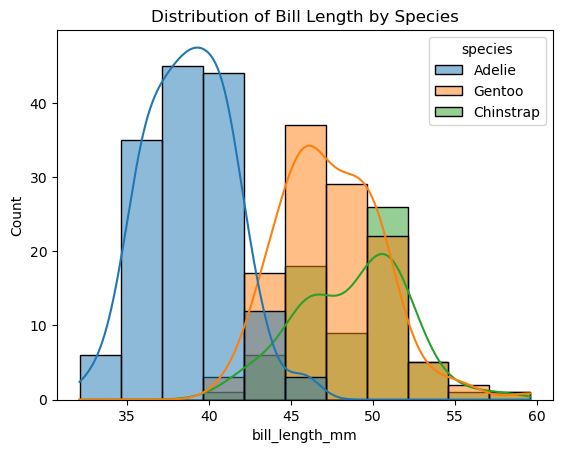

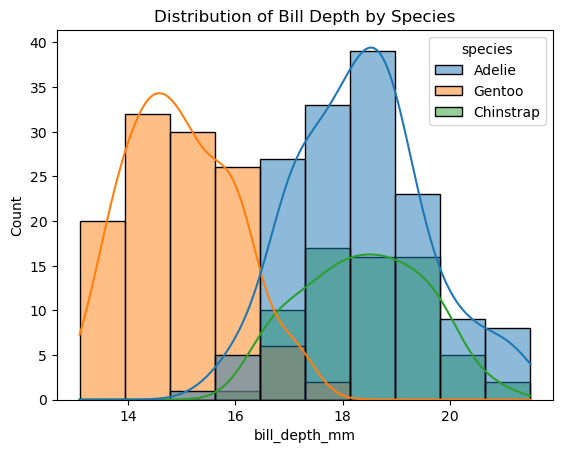

For Adelie penguins:
  Skewness of bill length: 0.15
  Kurtosis of bill length: -0.11
  Skewness of bill depth: 0.31
  Kurtosis of bill depth: -0.05

For Gentoo penguins:
  Skewness of bill length: 0.68
  Kurtosis of bill length: 1.19
  Skewness of bill depth: 0.31
  Kurtosis of bill depth: -0.61

For Chinstrap penguins:
  Skewness of bill length: -0.07
  Kurtosis of bill length: -0.03
  Skewness of bill depth: 0.01
  Kurtosis of bill depth: -0.84



In [18]:
"""# 2. What is the average body_mass_g for Gentoo penguins? (code)"""

gentoo_avg_body_mass = df[df['species'] == 'Gentoo']['body_mass_g'].mean()

print("Average body mass of Gentoo penguins:", gentoo_avg_body_mass)

"""# 3. How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)"""

#plot
sns.histplot(data=df, x='bill_length_mm', hue='species', kde=True, alpha=0.5)
plt.title('Distribution of Bill Length by Species')
plt.show()

sns.histplot(data=df, x='bill_depth_mm', hue='species', kde=True, alpha=0.5)
plt.title('Distribution of Bill Depth by Species')
plt.show()

for species in df['species'].unique():
    species_data = df[df['species'] == species]
    skewness_billlength = species_data['bill_length_mm'].skew()
    kurtosis_billlength = species_data['bill_length_mm'].kurtosis()
    skewness_billdepth = species_data['bill_depth_mm'].skew()
    kurtosis_billdepth = species_data['bill_depth_mm'].kurtosis()

    print(f"For {species} penguins:")
    print(f"  Skewness of bill length: {skewness_billlength:.2f}")
    print(f"  Kurtosis of bill length: {kurtosis_billlength:.2f}")
    print(f"  Skewness of bill depth: {skewness_billdepth:.2f}")
    print(f"  Kurtosis of bill depth: {kurtosis_billdepth:.2f}")
    print()

Outliers in bill_length_mm :  Series([], Name: bill_length_mm, dtype: float64)
Outliers in bill_depth_mm :  Series([], Name: bill_depth_mm, dtype: float64)
Outliers in flipper_length_mm :  Series([], Name: flipper_length_mm, dtype: float64)
Outliers in body_mass_g :  73     15000.0
206    12000.0
324    10000.0
Name: body_mass_g, dtype: float64


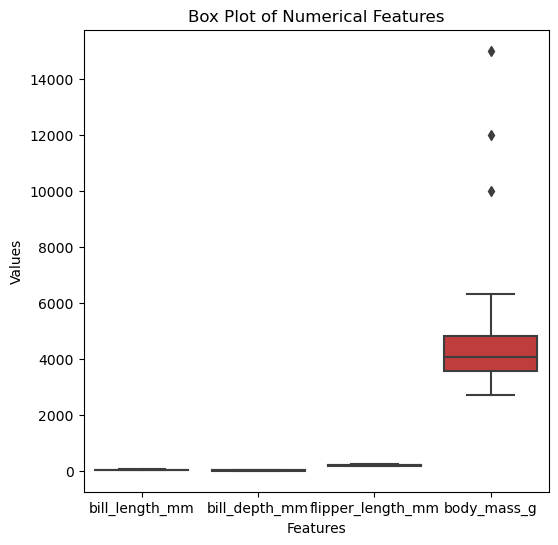

In [22]:
""""#4. Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)
"""

# Column outliers
columns_to_check = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# outliers using IQR
def detect_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Outlier in each column
for column in columns_to_check:
    outliers = detect_outliers(df[column])
    print(f"Outliers in {column} :  {outliers }")

# Visualization
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


Explained Variance Ratio: [0.61463045 0.19773499 0.13385213 0.05378244]
Cumulative Explained Variance Ratio: [0.61463045 0.81236544 0.94621756 1.        ]


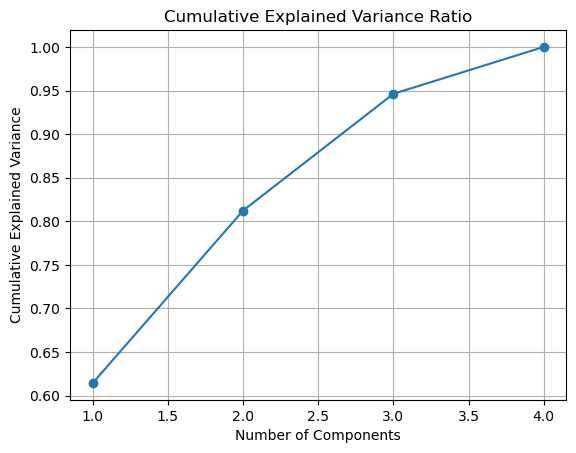

In [23]:
#Featuers
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[numerical_features]

#Missing value
X = X.fillna(X.mean())

#Standard value
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA
pca = PCA()
pca.fit(X_scaled)

#Variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_variance_ratio)

# Visualization
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

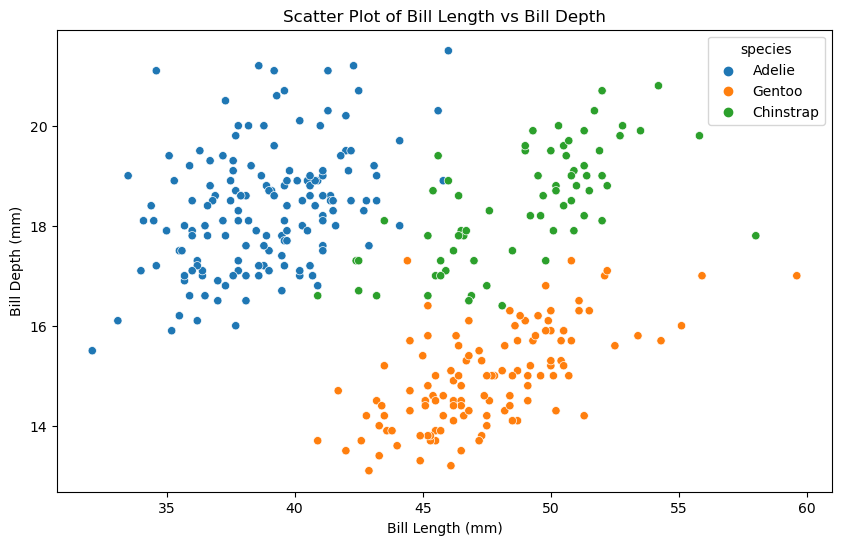

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

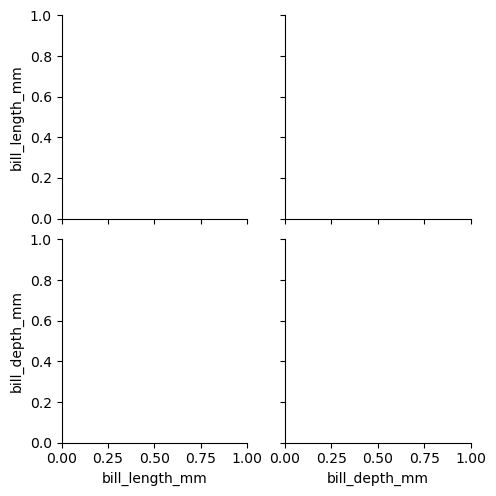

In [34]:
"""# 6. Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)"""

#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species')
plt.title('Scatter Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

#Pair Plot
sns.pairplot(df[['bill_length_mm', 'bill_depth_mm', 'species']], hue='species')
plt.show()

#Joint Plot
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, kind='kde')
plt.show()

#Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title('Box Plot of Bill Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='bill_depth_mm', data=df)
plt.title('Box Plot of Bill Depth by Species')
plt.show()

#Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='bill_length_mm', data=df)
plt.title('Violin Plot of Bill Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='bill_depth_mm', data=df)
plt.title('Violin Plot of Bill Depth by Species')
plt.show()

#Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='species', y='bill_length_mm', data=df)
plt.title('Swarm Plot of Bill Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.swarmplot(x='species', y='bill_depth_mm', data=df)
plt.title('Swarm Plot of Bill Depth by Species')
plt.show()

#Correlation Plot
corr_matrix = df[['bill_length_mm', 'bill_depth_mm']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    202.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64


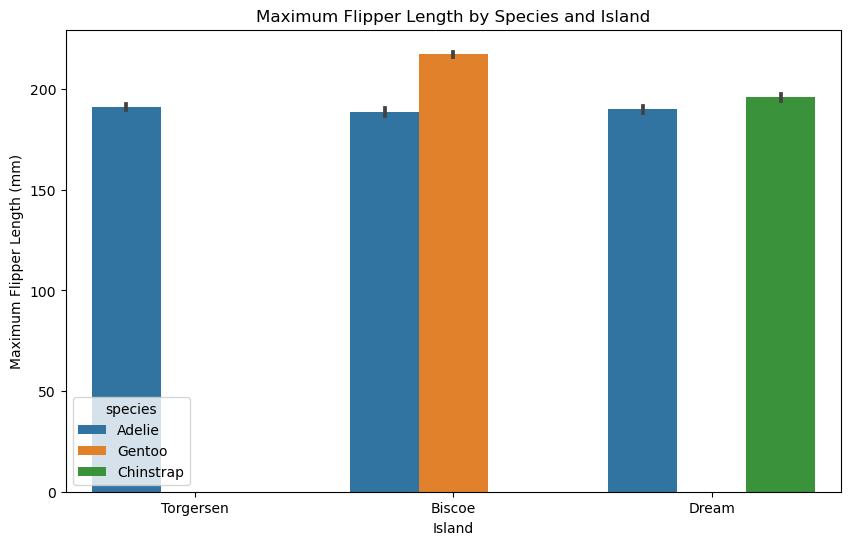

In [25]:
"""# 7. Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)"""

#Group
max_flipper_length = df.groupby(['species', 'island'])['flipper_length_mm'].max()
print(max_flipper_length)

#Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='island', y='flipper_length_mm', hue='species', data=df)
plt.title('Maximum Flipper Length by Species and Island')
plt.xlabel('Island')
plt.ylabel('Maximum Flipper Length (mm)')
plt.show()

In [26]:
"""# 8. Perform z-score normalization on this dataset. (code)
"""

numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.879791       0.778821          -1.414279   
1  Adelie  Torgersen       -0.806423       0.116100          -1.058048   
2  Adelie  Torgersen       -0.659687       0.421971          -0.416833   
4  Adelie  Torgersen       -1.319999       1.084692          -0.559326   
5  Adelie  Torgersen       -0.843107       1.747412          -0.773064   

   body_mass_g     sex  
0    -0.465631    male  
1    -0.421433  female  
2    -0.907613  female  
4    -0.730820  female  
5    -0.554027    male  
